In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import svm
#from imblearn.over_sampling import SMOTENC
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler

<b><span style="color:red"> 1.Data Understanding: </span></b>

A.Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [2]:
ndata=pd.read_csv("Part1+-+Normal.csv")

In [3]:
hdata=pd.read_csv("Part1+-+Type_H.csv")

In [4]:
sdata=pd.read_csv("Part1+-+Type_S.csv")

B.Print Shape and columns of all the 3 DataFrames. 

In [5]:
ndata.shape

(100, 7)

In [6]:
hdata.shape

(60, 7)

In [7]:
sdata.shape

(150, 7)

C.Compare Column names of all the 3 DataFrames and clearly write observations.

In [8]:
ndata.columns.intersection(hdata.columns).intersection(sdata.columns)

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [9]:
print(ndata.columns.difference(hdata.columns))
print(ndata.columns.difference(sdata.columns))
print(hdata.columns.difference(sdata.columns))

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


column names are same in all the dataframes.there is no additional or differnt columns present in the data frames.

D.Print DataTypes of all the 3 DataFrames.

In [10]:
print(ndata.dtypes)
print(hdata.dtypes)
print(sdata.dtypes)

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


E.Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.

In [11]:
ndata["Class"].unique()

array(['Normal', 'Nrmal'], dtype=object)

In [12]:
hdata["Class"].unique()

array(['Type_H', 'type_h'], dtype=object)

In [13]:
sdata["Class"].unique()

array(['Type_S', 'tp_s'], dtype=object)

<b>2.Data Preparation and Exploration:</b>

A.Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

In [14]:
ndata['Class'] = ndata['Class'].str.replace('Nrmal','Normal')
ndata.head(20)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
5,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373,Normal
6,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,Normal
7,38.126589,6.557617,50.445075,31.568971,132.114805,6.338199,Normal
8,51.624672,15.969344,35.000000,35.655328,129.385308,1.009228,Normal
9,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,Normal


In [15]:
hdata['Class']=hdata['Class'].str.replace('type_h','Type_H')
hdata.head(20)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Type_H
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Type_H
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Type_H
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Type_H
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Type_H


In [16]:
sdata['Class']=sdata['Class'].str.replace('tp_s','Type_S')
sdata.head(20)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S
5,83.933009,41.286305,62.000000,42.646703,115.012334,26.588100,Type_S
6,78.491730,22.181798,60.000000,56.309932,118.530327,27.383213,Type_S
7,75.649731,19.339799,64.148685,56.309932,95.903629,69.551303,Type_S
8,72.076278,18.946176,51.000000,53.130102,114.213013,1.010041,Type_S
9,58.599529,-0.261499,51.500000,58.861028,102.042812,28.059697,Type_S


B.Combine all the 3 DataFrames to form a single DataFrame 

In [17]:
data=ndata.append([sdata,hdata])
data.shape

(310, 7)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [19]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

D.Print Feature-wise percentage of Null values. 

In [20]:
data.isnull().mean()

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

E.Check 5-point summary of the new DataFrame.

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [22]:
data['Class']=data['Class'].astype('category')

In [23]:
data['Class'].nunique()

3

<b>3.Data Analysis:</b>


A.Visualize a heatmap to understand correlation between all features 

In [24]:
data.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


<Axes: >

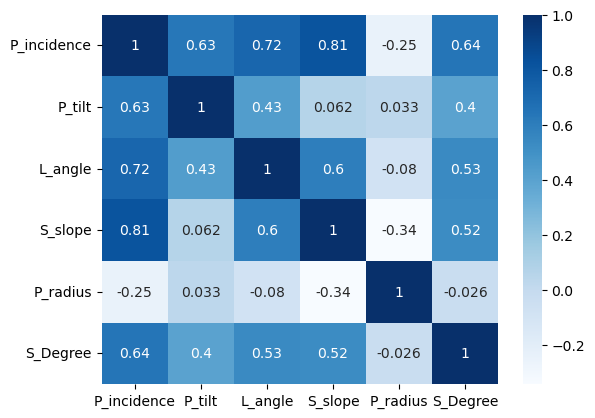

In [25]:
sns.heatmap(data.corr(),annot=True,cmap="Blues")

<b>B.Share insights on correlation.</b>

A.Features having stronger correlation with correlation value

1.S_slope and p_incidence scored correlation value is 0.81.which is having near to 1 and comparing to all S_slop and P_incidence are having highest correlation.


2.L_angle and P_incidence scored correlation value is 0.72. is the next pair having the correlarion of 0.72.

B.Features having weaker correlation with correlation value

1.P_radius and L_angle scored correlation value is -0.08.which is almost near to 0.hence it is having weaker correlation 

2.P_radius and P_incidence scored correlation value is -0.25.which have weak correlation 

3.S_Degree and P_radius scored correlation value is -0.26.which have weak correlation

<b>C.Visualize a pairplot with 3 classes distinguished by colors and share insights</b>

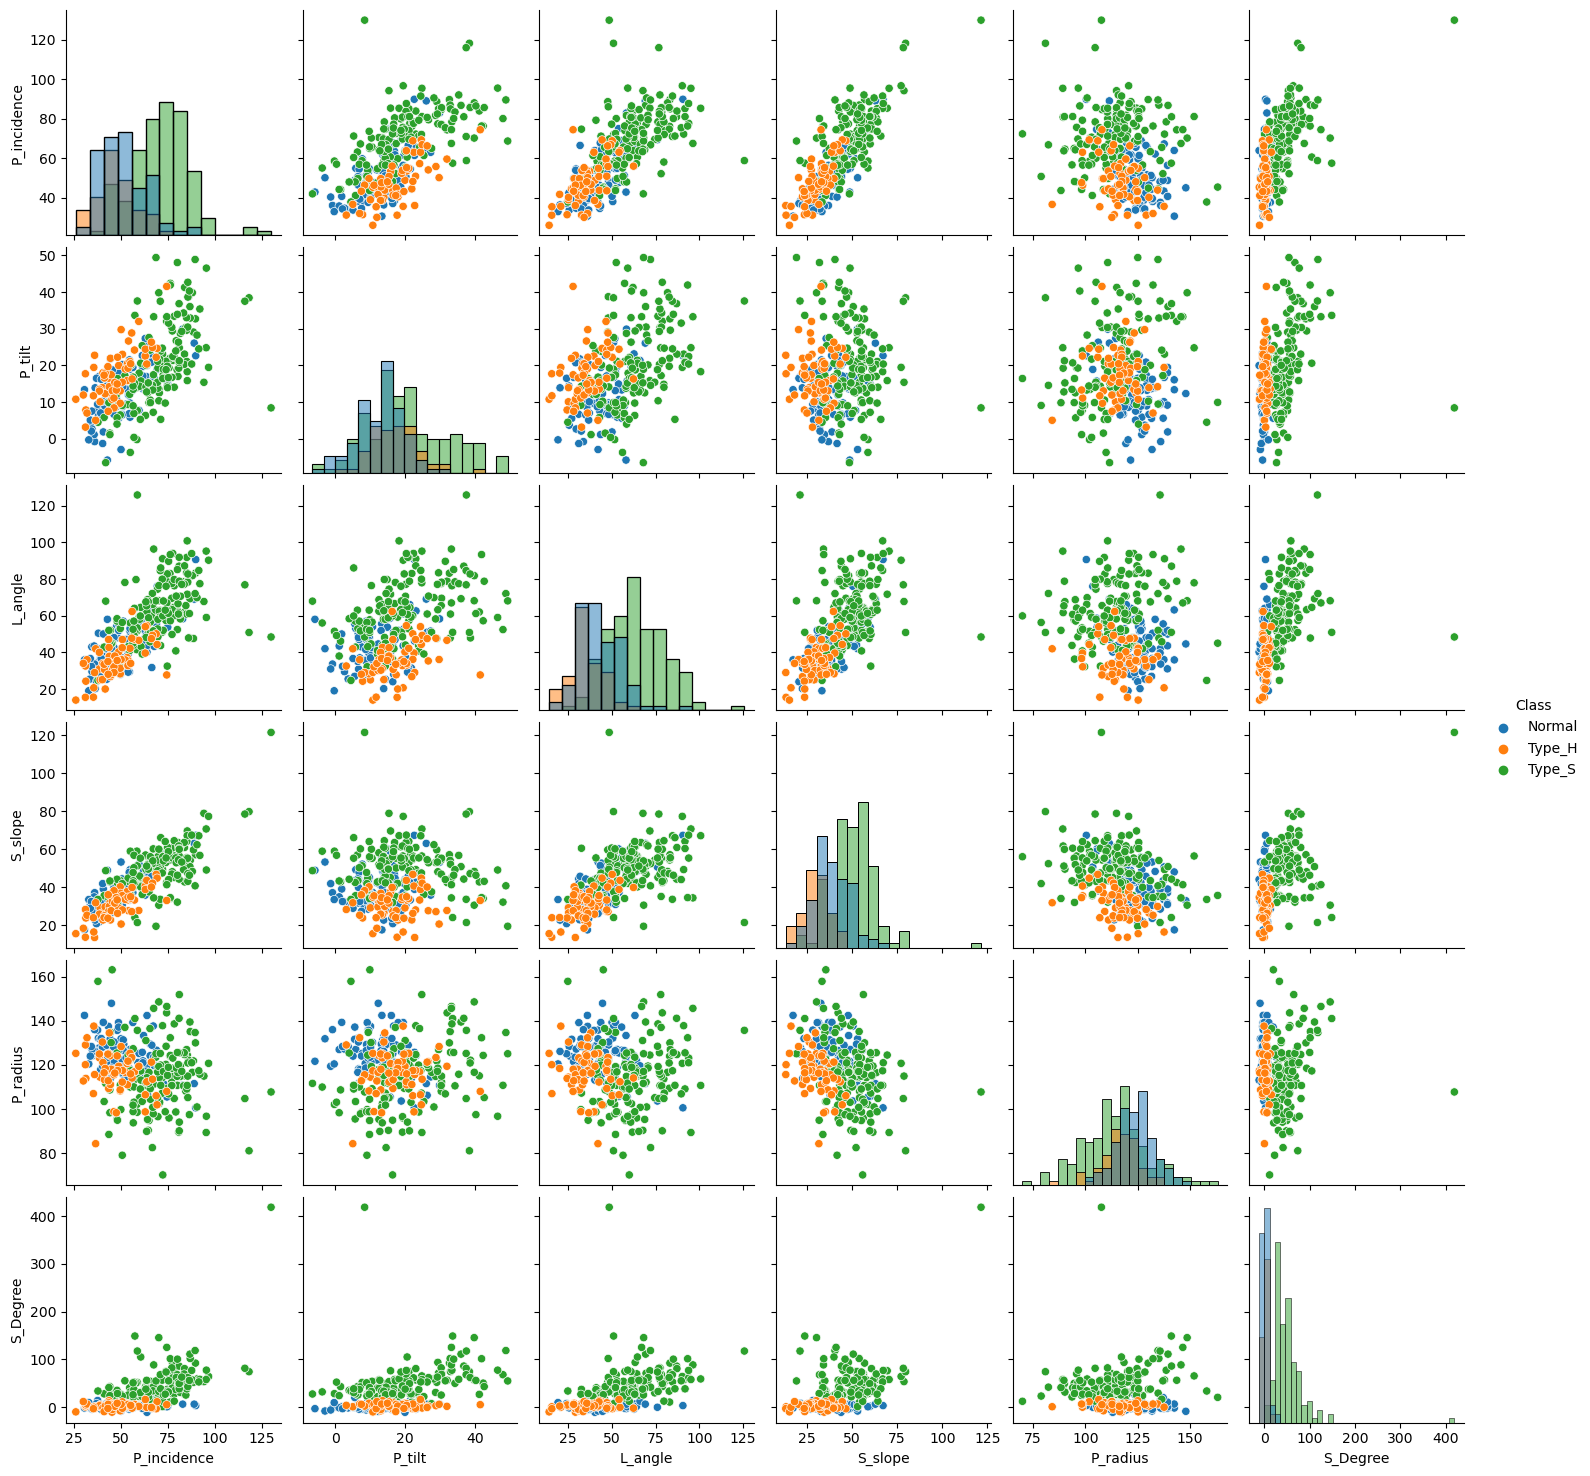

In [26]:
sns.pairplot(data,hue='Class',diag_kind="hist")

Along the diagonal we can see the distribution of individual variable

P_incidence has postive realtionship with all variables except P_radius. Relationship is higher for S_slope and L_angle

P_tilt has Higher Relationship with P_incidence and L_angle.There is no Relationship with s_slope and p_radius

L_angle has postive Relationship with p_tilt,s_slope and s_degree. It has no Relationship with P_radius

s_slope has positive Relationship with L_angle and s_degree

p_radius has no Relationship with s_degree,p_tilt,l_angle.

S_degree has no strong positive Relationship with any of the variables.

It is evident that type_s class is more compared to other two

Normal class has higher values compared to Type_H



D.Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

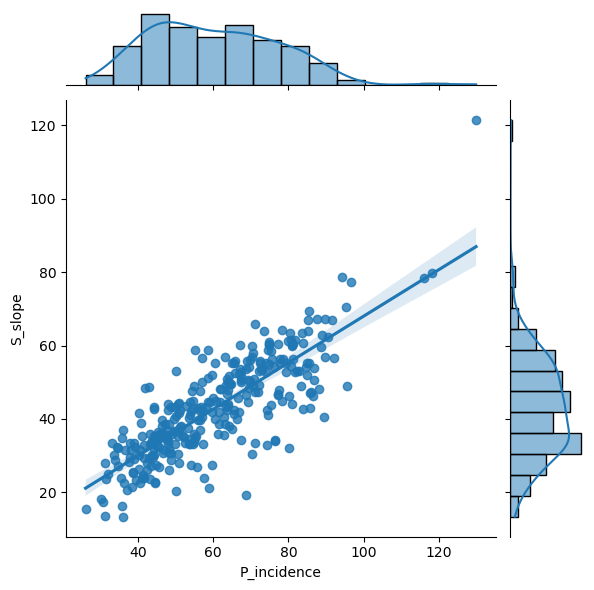

In [27]:
sns.jointplot(x = "P_incidence", y = "S_slope",
              kind = "reg", data = data)

The p_incidence and S_slope have good relationship with each other.as one increase so as the other.

The marginal histograms are both slightly right-skewed.

There are some outliers.

E.Visualize a boxplot to check distribution of the features and share insights.

<Axes: >

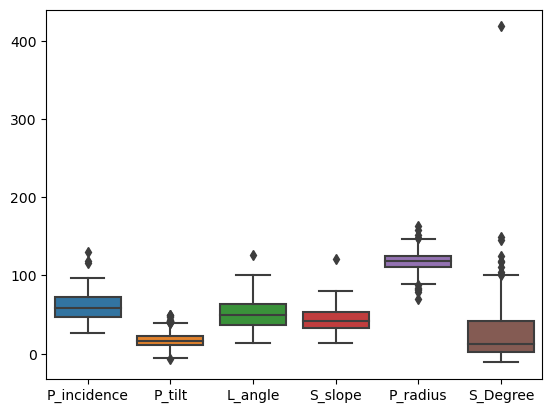

In [28]:
sns.boxplot(data=data)

<b>4.Model Building:</b>

A.Split data into X and Y. 

In [29]:
# Arrange data into independent variables and dependent variables
X=data.drop(columns='Class')
y=data['Class'] #target

In [30]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [31]:
from scipy.stats import zscore
X_Scaled=X.apply(zscore)


In [32]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,-9.168293e-17,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.406677e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.719055e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,-1.489848e-16,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-6.876220e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-1.146037e-17,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


B.Split data into train and test with 80:20 proportion.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [34]:
X_train.shape

(248, 6)

C.Train a Supervised Learning Classification base model using KNN classifier

In [35]:
KNN = KNeighborsClassifier(n_neighbors= 5,metric = 'euclidean'  )

In [36]:
KNN.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

D.Print all the possible performance metrics for both train and test data. 

In [37]:
predicted_labels = KNN.predict(X_test)
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.9112903225806451
Accuracy on Test data: 0.7741935483870968


Confusion Matrix


<Axes: >

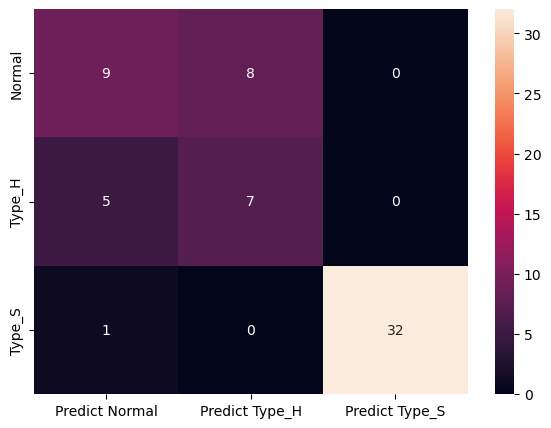

In [38]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal", "Type_H","Type_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [39]:
from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.60      0.53      0.56        17
      Type_H       0.47      0.58      0.52        12
      Type_S       1.00      0.97      0.98        33

    accuracy                           0.77        62
   macro avg       0.69      0.69      0.69        62
weighted avg       0.79      0.77      0.78        62



Precision for Normal class: It tells,out of all predicted normal class what fraction are predicted correctly

Recall(sensitivity or TPR) for Normal class: Out of all actual Normal class how much fraction we identified correctly

Normal predicted correctly for 60% of time. similary for Type_H 47% and Type_S 100%

By F1 score we can say that precison and recall is balanced for Normal by 56% and for Type_H by 52 %

We have maximum F1 score for Type_S.

<b>5.Performance Improvement:</b>
    
 A. Experiment with various parameters to improve performance of the base model. 

In [40]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

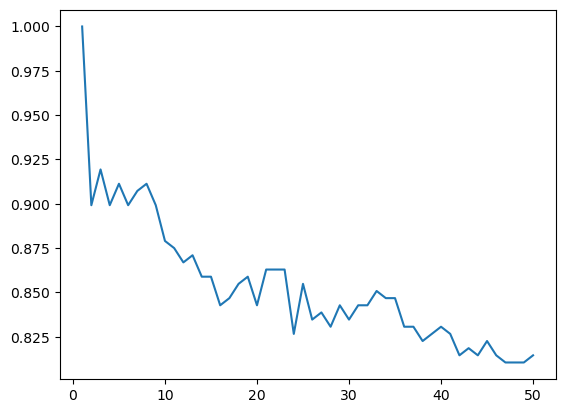

In [41]:
plt.plot(range(1,51),train_score)
plt.show()

Here training accuracy decreases when increase k value

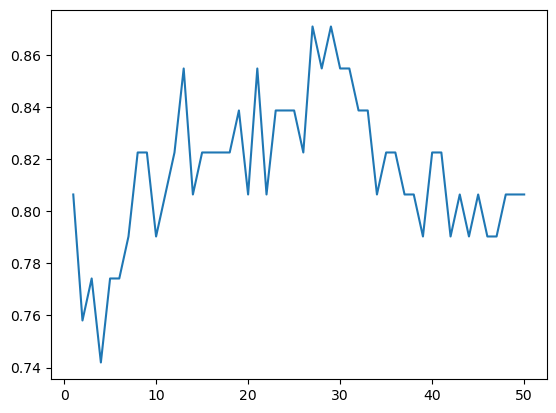

In [42]:
plt.plot(range(1,51),test_score)
plt.show()

The maximum accuracy occures when k is less than 20.

We will fix k value as less than 20.

B.Clearly showcase improvement in performance achieved.

For Example:A.Accuracy: +15% improvement
B.Precision: +10% improvement

In [43]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8064516129032258:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.73      0.47      0.57        17
      Type_H       0.53      0.75      0.62        12
      Type_S       0.97      1.00      0.99        33

    accuracy                           0.81        62
   macro avg       0.74      0.74      0.73        62
weighted avg       0.82      0.81      0.80        62

Accuracy on Training data for k 3 is 0.9193548387096774:
Accuracy on Test data for k 3 is 0.7741935483870968:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.60      0.53      0.56        17
      Type_H       0.43      0.50      0.46        12
      Type_S       1.00      1.00      1.00        33

    accuracy                           0.77        62
   macro avg       0.68      0.68      0.67        62
weighted avg       0.78      0.77     

For K=11 we have balanced train and test error

we can use k value as 11 because when we increase this value the precision becomes100% for Type_S.

C.Clearly state which parameters contributed most to improve model performance. 


In [44]:
KNN = KNeighborsClassifier(n_neighbors= 11,metric = 'euclidean'  )
KNN.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [45]:
predicted_labels = KNN.predict(X_test)
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.875
Accuracy on Test data: 0.8064516129032258


For Knn, k=11 we are getting balanced train and test error

We can use KNN as a final model because of balanced train and test error also the recall and precision values are good

<b><font> Part B - 30 Marks</font></b>


A.Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. 

In [46]:
data1=pd.read_csv("Part2+-+Data1.csv")

In [47]:
data2=pd.read_csv("Part2+-Data2.csv")

B.Print shape and Column Names and DataTypes of both the Dataframes.

In [48]:
print(data1.shape)
print(data2.shape)
print(data1.columns)
print(data2.columns)

(5000, 8)
(5000, 7)
Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


In [49]:
data1.head(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [50]:
data2.head(5)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


C.Merge both the Dataframes on ‘ID’ feature to form a single DataFrame 

In [51]:
Data=pd.merge(data1,data2,how="left",on="ID"
        )

In [52]:
Data.reset_index(inplace=True)
Data.drop('index',axis=1,inplace=True)

In [53]:
Data.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [54]:
Data.head(20)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0


D.Change Datatype of below features to ‘Object’ 

    ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’

In [55]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard','LoanOnCard']
for i in col:
    Data[i]=Data[i].astype("category")


In [56]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.7 KB


<b>2.Data Exploration and Analysis:</b>
   

In [57]:
#Target variable Loanoncard having few missing records
Data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

A.Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

<b>Univariate Analysis</b>

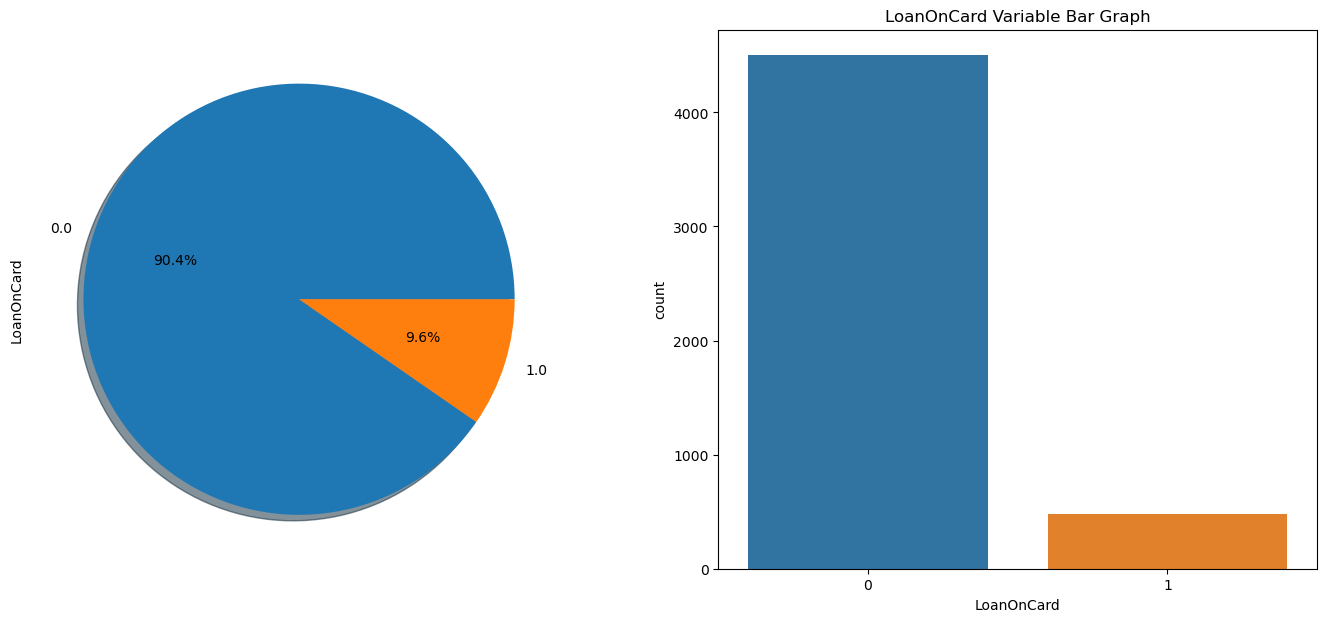

In [66]:
f,axes=plt.subplots(1,2,figsize=(17,7))
Data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(x=Data['LoanOnCard'],ax=axes[1],order=[0,1])

#axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

We can see 90% of people does not have loan on credit card

<b>Bi Variate Analysis</b>

LoanOnCard Vs HighestSpend

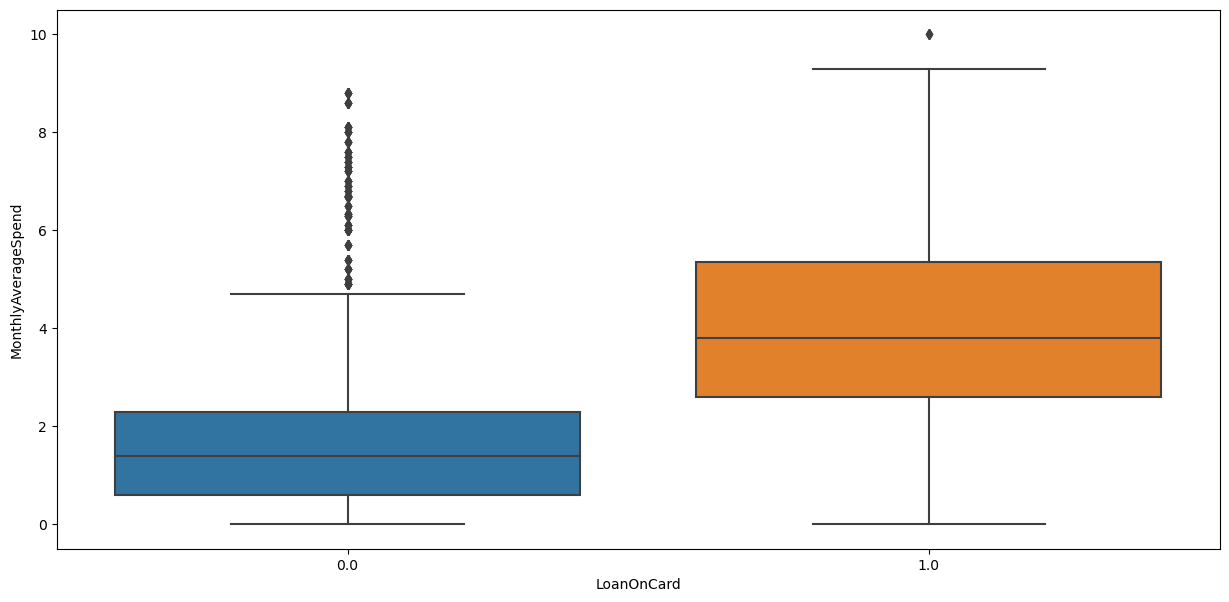

In [67]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= Data)
plt.show()

Monthly average spend is more for loan holders

This column is directly proportional to highest spend

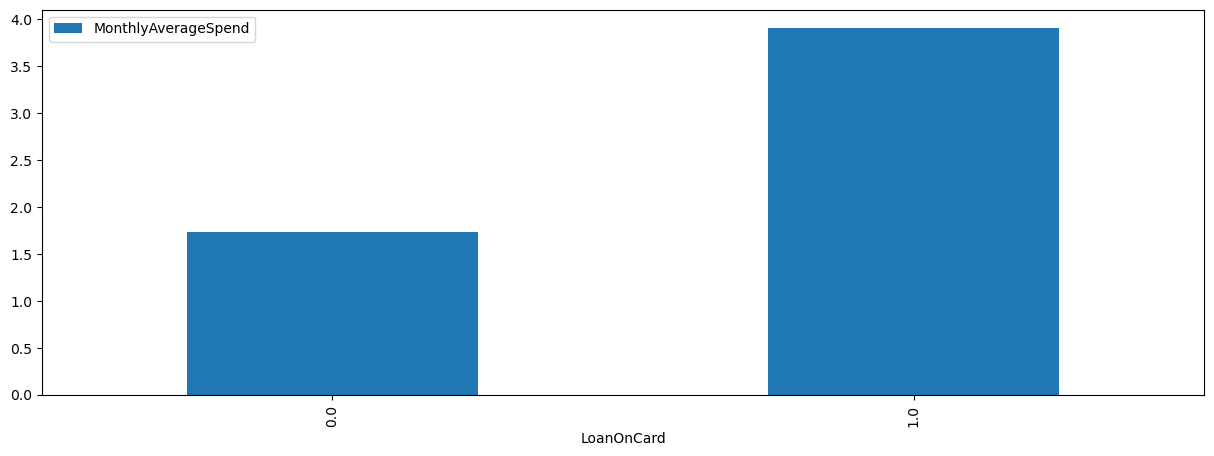

In [68]:
Data.groupby(by=['LoanOnCard'])['MonthlyAverageSpend'].mean().reset_index().sort_values(['MonthlyAverageSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='MonthlyAverageSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

Average spend mean values are more for loan holders.

<b>LoanOnCard vs HiddenScore</b>

<Axes: xlabel='Security', ylabel='count'>

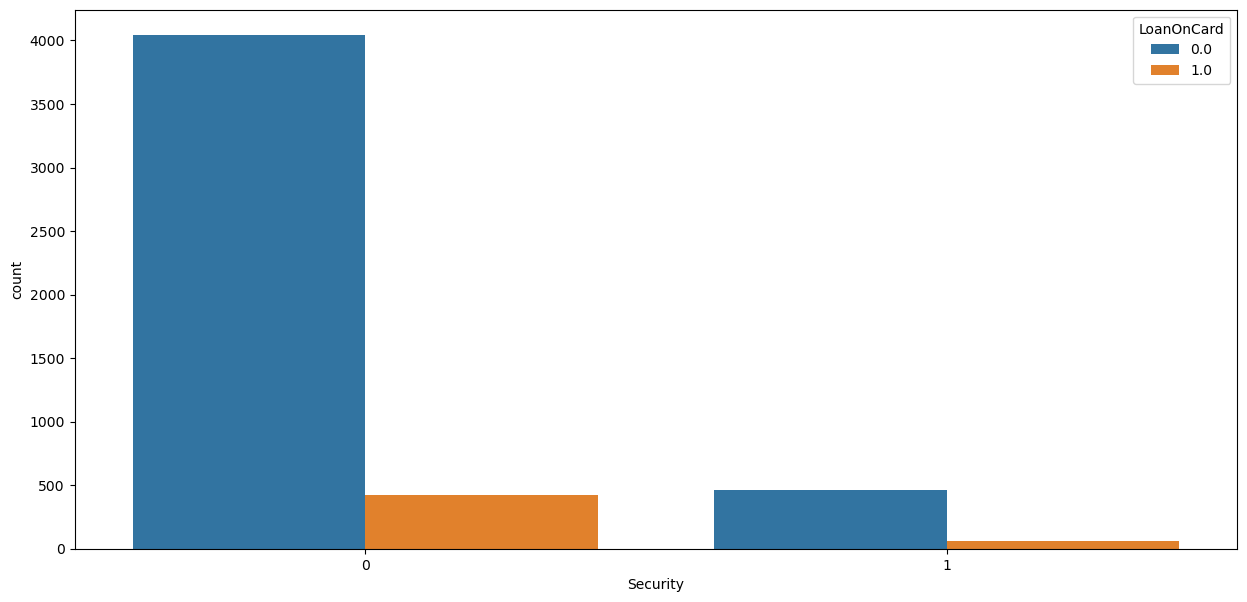

In [70]:
plt.figure(figsize=(15,7))
sns.countplot(x=Data['Security'],hue=Data['LoanOnCard'])

It is surprisingly to see more customers those who have loan does not have any security

Security of loan holders are very less

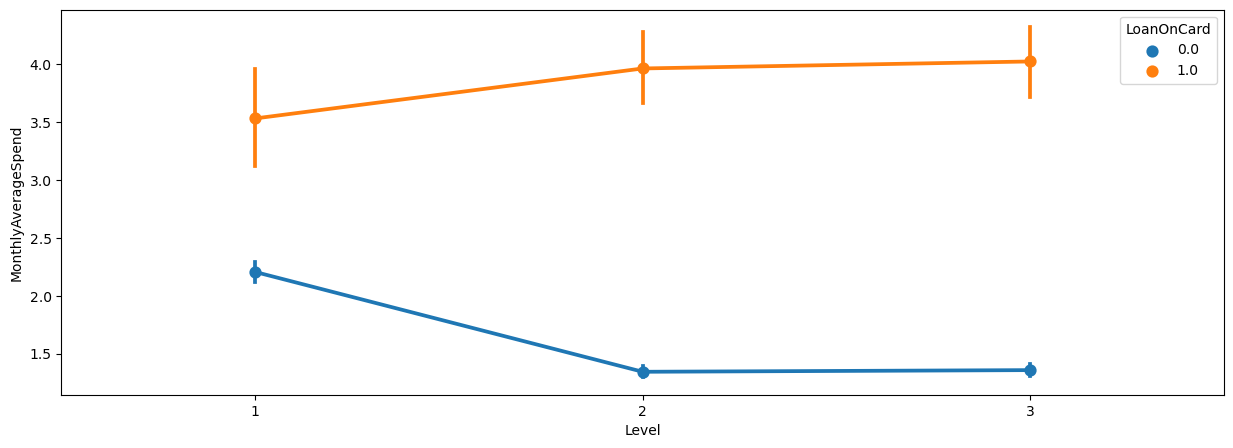

In [71]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Level", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=Data)
plt.show()

We can clearly see that loan holder spend more money.Particulary the spend is more on level 2 and 3

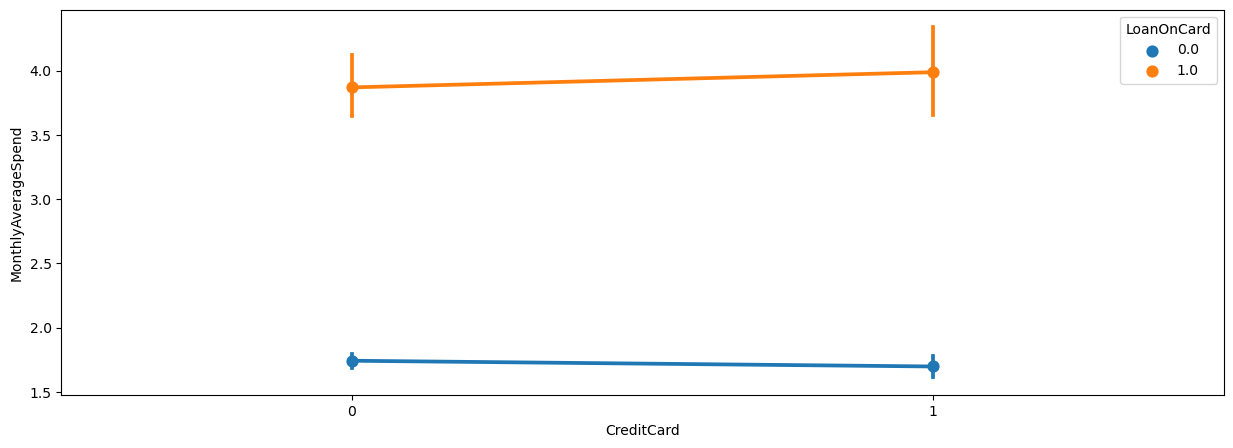

In [72]:
plt.figure(figsize=(15,5))
sns.pointplot(x="CreditCard", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=Data)
plt.show()

Spend is slightly more for credit card holders

<b>B. Check the percentage of missing values and impute if required.</b>

In [73]:
percent_missing = Data.isnull().sum() * 100 / len(Data)
missing_value_df = pd.DataFrame({'column_name': Data.columns,
                                 'percent_missing': percent_missing})

In [74]:
percent_missing

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [75]:
missing_value_df


,column_name,percent_missing
ID,ID,0.0
Age,Age,0.0
CustomerSince,CustomerSince,0.0
HighestSpend,HighestSpend,0.0
ZipCode,ZipCode,0.0
HiddenScore,HiddenScore,0.0
MonthlyAverageSpend,MonthlyAverageSpend,0.0
Level,Level,0.0
Mortgage,Mortgage,0.0
Security,Security,0.0


<b>C. Check for unexpected values in each categorical variable and impute with best suitable value.</b>

In [76]:
Data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

LoanOnCard has 20 values as null.replacing it with 0

In [77]:
Data["LoanOnCard"].unique()

[NaN, 1.0, 0.0]
Categories (2, float64): [0.0, 1.0]

In [78]:
data.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [79]:
Data['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [80]:
from numpy import NaN 
Data["LoanOnCard"] = Data["LoanOnCard"].fillna(0)


In [81]:
Data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

<b>3. Data Preparation and model building:</b>

A. Split data into X and Y

[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

In [82]:
Data.drop('ID',axis=1,inplace=True)
Data.drop('ZipCode',axis=1,inplace=True)

In [83]:
Data.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [84]:
# Arrange data into independent variables and dependent variables
X=Data.drop(columns='LoanOnCard')
y=Data['LoanOnCard'] #target

In [85]:
X.head(2)

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0


In [86]:
y.head(2)

0    0.0
1    0.0
Name: LoanOnCard, dtype: category
Categories (2, float64): [0.0, 1.0]

<b>B. Split data into train and test. Keep 25% data reserved for testing.</b>

In [87]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10,shuffle=False)

In [88]:
X_train.shape

(3750, 11)

In [89]:
X_test.shape

(1250, 11)

<b>C. Train a Supervised Learning Classification base model - Logistic Regression.</b>

In [90]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.948
Accuracy on Test data: 0.9552


94% accuracy on training set and 94% accuracy on test set.

Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good

<b>D. Print evaluation metrics for the model and clearly share insights. </b>

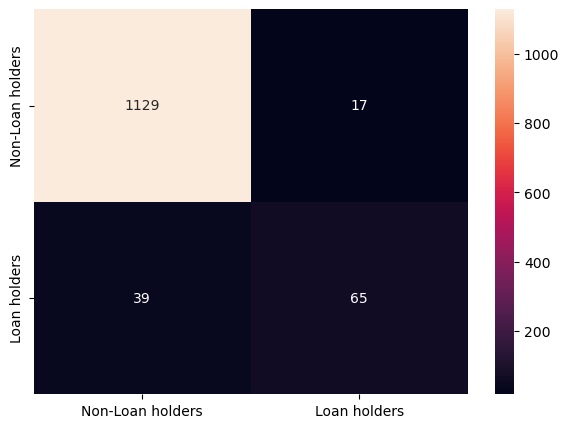

In [91]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [92]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1146
         1.0       0.79      0.62      0.70       104

    accuracy                           0.96      1250
   macro avg       0.88      0.81      0.84      1250
weighted avg       0.95      0.96      0.95      1250



In [93]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [94]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9552


In [95]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0448


In [96]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#True positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

#Flase positive  rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#specificity
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Precision : 0.9852
Recall or Sensitivity : 0.9666
True Positive Rate : 0.9666
False Positive Rate : 0.2073
False Positive Rate : 0.2073


Here you can see model is poor in predicting class 1 compared to class 0

Accuracy is good but in this case we need to look on recall value

Here Recall tells that only 58% class 1 is predicted correctly from actual values

We dont have enough sample of class 1 to train the model.

We will do the sampling and check how recall values improves in this case.

<b>E. Balance the data using the right balancing technique. </b>

i. Check distribution of the target variable

ii. Say output is class A : 20% and class B : 80%

iii. Here you need to balance the target variable as 50:50.

iv. Try appropriate method to achieve the same.

<b>Here we are doing smote for all data</b>

In [97]:
!pip install imblearn
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [98]:
smote_nc=SMOTENC(categorical_features=[3,5,7,8,9,10],random_state=10) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

In [99]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64


In [100]:
print('After sampling:')
print(y_s.value_counts())
print(y_s.shape)

After sampling:
0.0    4520
1.0    4520
Name: LoanOnCard, dtype: int64
(9040,)


In [101]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.25, random_state=10,shuffle=False)
#X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

In [102]:
X_train.head(200)

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,34,10,13,4,1.0,1,95,1,0,1,0
196,48,24,165,1,5.0,1,0,0,0,0,1
197,55,31,9,4,0.7,1,89,0,0,1,0
198,27,3,59,4,0.0,1,90,1,0,1,0


In [103]:
X_train.isna().sum()

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
dtype: int64

In [104]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   int64   
 1   CustomerSince        5000 non-null   int64   
 2   HighestSpend         5000 non-null   int64   
 3   HiddenScore          5000 non-null   category
 4   MonthlyAverageSpend  5000 non-null   float64 
 5   Level                5000 non-null   category
 6   Mortgage             5000 non-null   int64   
 7   Security             5000 non-null   category
 8   FixedDepositAccount  5000 non-null   category
 9   InternetBanking      5000 non-null   category
 10  CreditCard           5000 non-null   category
 11  LoanOnCard           5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.6 KB


In [105]:
X_test["InternetBanking"]=X_test["InternetBanking"].fillna(0)
X_test["CreditCard"]=X_test["CreditCard"].fillna(0)
X_test["Security"]=X_test["Security"].fillna(0)
X_test["FixedDepositAccount"]=X_test["FixedDepositAccount"].fillna(0)

In [106]:
X_train["InternetBanking"]=X_train["InternetBanking"].fillna(0)
X_train["CreditCard"]=X_train["CreditCard"].fillna(0)
X_train["Security"]=X_train["Security"].fillna(0)
X_train["FixedDepositAccount"]=X_train["FixedDepositAccount"].fillna(0)

In [107]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9048672566371682
Accuracy on Test data: 0.8575221238938053


<b>Here both accuracy is reduced after sampling. Let us check on the classification report.</b>

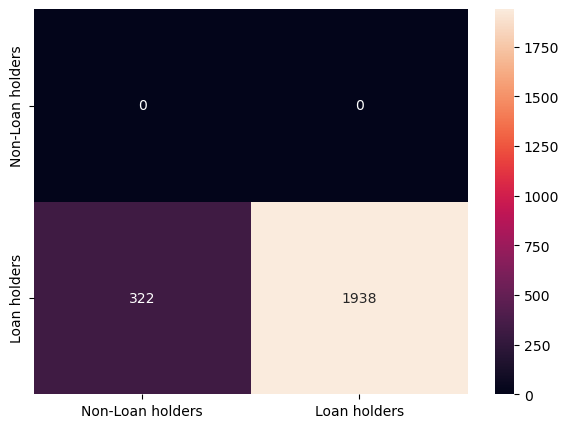

In [108]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [109]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.86      0.92      2260

    accuracy                           0.86      2260
   macro avg       0.50      0.43      0.46      2260
weighted avg       1.00      0.86      0.92      2260



Now we can see recall value is improved after sampling.

So whenever we have imbalance target we will use sampling method to balance the data.

<b>If we do smote on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.</b>

<b>F.Again train the same previous model on balanced data.</b>

we are doing smote only for training data

In [110]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [111]:
smote_nc=SMOTENC(categorical_features=[3,4,5,7,8,9,10],random_state=42)
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)


In [112]:
x_train_res.isna().sum()
#y_train_res.isna().sum()

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
dtype: int64

In [113]:
x_train_res["InternetBanking"]=x_train_res["InternetBanking"].fillna(0)
x_train_res["CreditCard"]=x_train_res["CreditCard"].fillna(0)
x_train_res["Security"]=x_train_res["Security"].fillna(0)
x_train_res["FixedDepositAccount"]=x_train_res["FixedDepositAccount"].fillna(0)

In [114]:
logit = LogisticRegression()
logit.fit(x_train_res, y_train_res)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8896
Accuracy on Test data: 0.88


<b>G.Print evaluation metrics and clearly share differences observed</b>

we can see there is decrease in test accuracy.

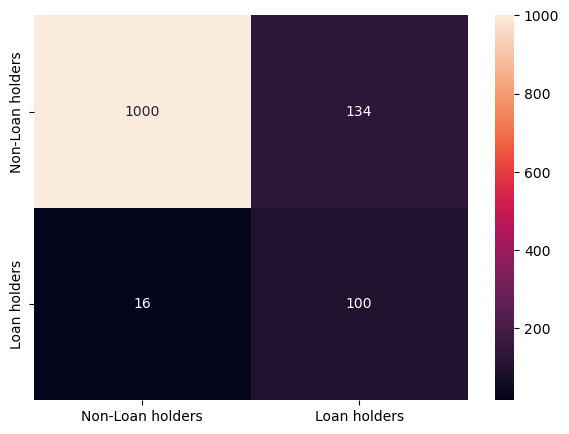

In [115]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [116]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      1134
         1.0       0.43      0.86      0.57       116

    accuracy                           0.88      1250
   macro avg       0.71      0.87      0.75      1250
weighted avg       0.93      0.88      0.90      1250



After doing sampling only on training data we can see difference in values

We are getting good recall value but the precision value is reduced

We will do sampling oly on training data to check real performance of the model

<b>4.Performance Improvement: [10 Marks]
    
A.Train a base model each for SVM, KNN. [4 Marks]
    
B.Tune parameters for each of the models wherever required and finalize a model.[3 Marks](Optional: Experiment with various Hyperparameters - Research required)
    
C.Print evaluation metrics for final model. [1 Marks]

D.Share improvement achieved from base model to final model</b>

In [117]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
svm_model=svm.SVC()

LR: 0.947800 (0.007718)
KNN: 0.910200 (0.011505)
NB: 0.883200 (0.011496)
svm: 0.907800 (0.011915)


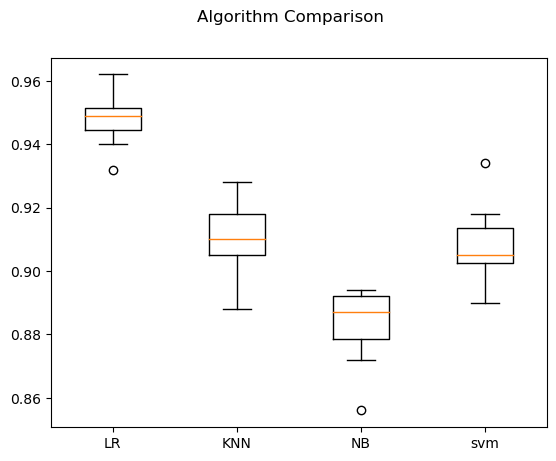

In [118]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('svm',svm_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<b>Very slight improvement in accuracy</b>

<b>Conclusion and improvisation.</b>

We are selecting final model as logistic regression as it performs well in training and testing test.

Logistic Regression is not affected by overfitting and it is also has good recall value.

Logistic regression performed well in k-fold cross validation as well.

Deviation also less in logistic regression.

Sampling improved to predict minority classes as well

Suggesting to collect data equally for both the classes.

Few customers does't have credit card but those customer having loan on card. This data error can be avoided